## PROJET BASE DE DONNEES FORMAT JSON FLOUPICS

---

### 1- Modélisation conceptuelle du jeu de données Movies.csv et Ratings.csv sous StarUML

La classe Movies comporte 3 attributs :   

     - MovieId la clé primaire unique
     - Titre
     - Genres

**Objectif** : cette classe devra afficher le titre du film

La classe Ratings comprte 4 attributs :    

     - UserId clé Id 
     - MovieId
     - Rating 
     - Timestamp
     
**Objectif** : cette classe devra afficher la note du film selectionné

Cardinalité de la relation Movies / Ratings : un film peut avoir 0 à plusieurs ratings.

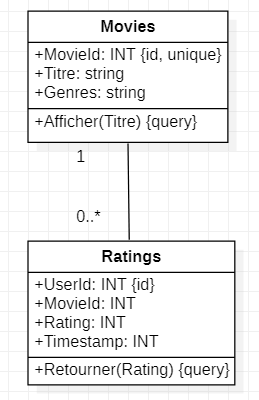

In [1]:
from IPython.display import Image
Image("C:/Users/utilisateur/SIMPLON/DEV-DATA/BRIEFS/FIL-ROUGE/FLOUPICS/movies-spinoff-json/Diagrammes_de_Classe/DIAGCLASSE1.png")

---

### Modélisation avec import du jeu de données Movies.csv et Ratings.csv sous Workbench

Le lien possible entre les 2 BDD se fait par la clé primaire movieId de la classe Movies.

Cette clé movieId devient la clé étrangère dans la classe ratings.

1 film peut avoir plusieurs notes émises par plusieurs utilisateurs.

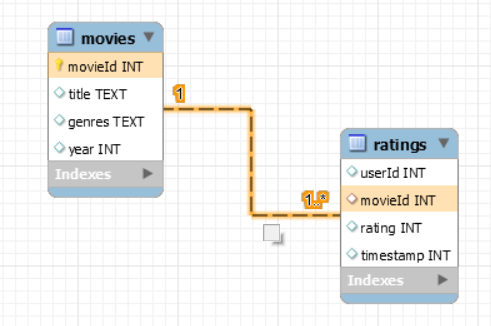

In [2]:
from IPython.display import Image
Image("C:/Users/utilisateur/SIMPLON/DEV-DATA/BRIEFS/FIL-ROUGE/FLOUPICS/movies-spinoff-json/Schema_Relationnel/SCHEMAIMPORTBDD.png")

---

### 2- Objet Movies sous BDD Json équivalente au schéma relationnel normalisé
La classe Movies sera représentée de la façon suivante sous Json. Chaque attribut sera imbriqué à la clé primaire movieId.

     "1": {
            "movieId": "1",
            "title": "Toy Story (1995)",
            "genres": "Adventure|Animation|Children|Comedy|Fantasy"
        },
     "2": {
            "movieId": "2",
            "title": "Jumanji (1995)",
            "genres": "Adventure|Children|Fantasy"
        },

---

### 2- Objet Ratings sous BDD Json équivalente au schéma relationnel normalisé

Nous constatons que l'imbrication de la clé en tant que clé primaire UserId ne peut se faire à cause de la multiplicité des enregistrements par attributs. 

Le UserId est répété à chaque rating, la clé n'est pas primaire car un utilisateur a noté plusieurs films. 

Une solution doit être apportée pour permettre l'imbrication des données.

    [
        {
            "userId": "1",
            "movieId": "1",
            "rating": "4.0",
            "timestamp": "964982703"
        },
        {
            "userId": "1",
            "movieId": "3",
            "rating": "4.0",
            "timestamp": "964981247"
        },
        {
            "userId": "1",
            "movieId": "6",
            "rating": "4.0",
            "timestamp": "964982224"
        },
        {
            "userId": "1",
            "movieId": "47",
            "rating": "5.0",
            "timestamp": "964983815"
        },
    ....]

---

### 3- Propoition 1 : Schéma imbriqué par Ratings

    {
    "userId":1,
    "movieId":1,
    "rating":4.0,
    "timestamp":964982703,
    "movies":
       [ 
           {
                "title": "Toy Story (1995)",
                "genres": "Adventure|Animation|Children|Comedy|Fantasy"
           }         
       ] 
    }
    {
    "userId":1,
    "movieId":3,
    "rating":4.0,
    "timestamp":964981247,
    "movies":
       [ 
           {

                "title": "Grumpier Old Men (1995)",
                "genres": "Adventure|Animation|Children|Comedy|Fantasy"
           }         
       ] 
    }

Cette solution ne semble pas pertinente car elle reprend individuellement chaque référence de la table Ratings. D'une part, toutes les données de chaque notation (par UserId et par MovieId) sont recopiées, il y a donc une redondance des informations sur les films et le fichier sera beaucoup trop lourd. D'autre part, il sera long et difficile de rechercher un film ou un utilisateur en particulier selon cette manière.

---

### 3- Proposition 2 : Schéma imbriqué par Movies

    {
    "movieId": "1",
    "title": "Toy Story (1995)",
    "genres": "Adventure|Animation|Children|Comedy|Fantasy"
    "ratings":
       [ 
           {
               "userId":1,
               "rating":4.0,
               "timestamp":964982703,
           },
           {
               "userId":7,
               "rating":4.5,
               "timestamp":1106635946
           }
           ...
       ] 
    }

Cette solution permet, en cliquant sur un film et ses informations, de connaître chaque note qu'il a reçu ainsi que l'Id de l'utilisateur qui l'a attribué. Elle peut être pertinente si nous souhaitons avoir le détail des notations par film.

---

### 3- Proposition 3 : Schéma imbriqué par Ratings, en individualisant UserId

    {
    "userId": "1",
    "ratings":
       [ 
           {
               "movieId":1
               "rating":4.0,
               "timestamp":964982703,
               "movies":
                   [
                       {
                            "title": "Toy Story (1995)",
                            "genres": "Adventure|Animation|Children|Comedy|Fantasy"  
                       }
                   ]
           },
           {
               "movieId":3
               "rating":4.0,
               "timestamp":964981247,
               "movieId":
                   [
                        {
                            "title": "Grumpier Old Men (1995)",
                            "genres": "Adventure|Animation|Children|Comedy|Fantasy"
                        }
                   ]
           }
           ...
       ] 
    }

Cette solution ne sera adaptée si l'on veut connaître les films notés pour un utilisateur précis, tout en ne possédant pas d'autres informations pour chaque utilisateur.

---

### 4- Proposition 4 : Schéma Json références et différences avec un système relationnel UUID

    [
        {
            "_id" : "7e93be68-7d6e-4506-9be5-ffd78e5afb5d",
            "userId": "1",
            "movieId": "1",
            "rating": "4.0",
            "timestamp": "964982703"

        },
        {
            "_id" : "850b1657-a070-4a25-ab63-6f61b436cf9d",
            "userId": "1",
            "movieId": "3",
            "rating": "4.0",
            "timestamp": "964981247"
        },
        {
            "_id" : "30ae9e51-f5c8-4022-a68d-3f3948dbdcb1",
            "userId": "1",
            "movieId": "6",
            "rating": "4.0",
            "timestamp": "964982224"
        },

### Les principales différences avec le relationnel sont :

- la création de "Universally Unique Identifer" , permettant d'identifier de façon unique chaque avis

- l'utilisation de ces identifiants universels permettant ainsi de régler le problème des multiples attributs par UserId

### 4- Proposition 5 : Schéma Json références et différences avec un système relationnel UUID

    {
    "title": "Toy Story (1995)",
    "movies":
        {
            "movieId": "1",
            "genres": "Adventure|Animation|Children|Comedy|Fantasy"
            "ratings":
            ["_id":"1591ff32-ccba-4e7b-96ee-b36342a1a729", 
             "_id":"30ae9e51-f5c8-4022-a68d-3f3948dbdcb1",

            ]
            ...
        }
    }

Cette solution contenant les clés UUID en imbrication à l'objet movies, renvoient les notes rating par User.